# Fine tuning your model

## Metrics for classification
In Chapter 1, you evaluated the performance of your k-NN classifier based on its accuracy. However, as Andy discussed, accuracy is not always an informative metric. In this exercise, you will dive more deeply into evaluating the performance of binary classifiers by computing a confusion matrix and generating a classification report.

You may have noticed in the video that the classification report consisted of three rows, and an additional support column. The support gives the number of samples of the true response that lie in that class - so in the video example, the support was the number of Republicans or Democrats in the test set on which the classification report was computed. The precision, recall, and f1-score columns, then, gave the respective metrics for that particular class.

Here, you'll work with the PIMA Indians dataset obtained from the UCI Machine Learning Repository. The goal is to predict whether or not a given female patient will contract diabetes based on features such as BMI, age, and number of pregnancies. Therefore, it is a binary classification problem. A target value of 0 indicates that the patient does not have diabetes, while a value of 1 indicates that the patient does have diabetes. As in Chapters 1 and 2, the dataset has been preprocessed to deal with missing values.

The dataset has been loaded into a DataFrame df and the feature and target variable arrays X and y have been created for you. In addition, sklearn.model_selection.train_test_split and sklearn.neighbors.KNeighborsClassifier have already been imported.

Your job is to train a k-NN classifier to the data and evaluate its performance by generating a confusion matrix and classification report.

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df=pd.read_csv("diabetes.csv")
df.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.shape

(768, 9)

In [4]:
df.dtypes

pregnancies      int64
glucose          int64
diastolic        int64
triceps          int64
insulin          int64
bmi            float64
dpf            float64
age              int64
diabetes         int64
dtype: object

In [5]:
X=df.drop('diabetes',axis=1).values.reshape(-1,8)
y=df['diabetes'].values.reshape(-1,1)

In [6]:
# Create training and test set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=42)

# Instantiate a k-NN classifier: knn
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the training data
knn.fit(X_train,y_train)

C:\Users\aduzo\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=6)

In [7]:
# Predict the labels of the test data: y_pred
y_pred = knn.predict(X_test)

# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[176  30]
 [ 56  46]]
              precision    recall  f1-score   support

           0       0.76      0.85      0.80       206
           1       0.61      0.45      0.52       102

    accuracy                           0.72       308
   macro avg       0.68      0.65      0.66       308
weighted avg       0.71      0.72      0.71       308



By analyzing the confusion matrix and classification report, you can get a much better understanding of your classifier's performance.

## Building a logistic regression model

Time to build your first logistic regression model! As Hugo showed in the video, scikit-learn makes it very easy to try different models, since the Train-Test-Split/Instantiate/Fit/Predict paradigm applies to all classifiers and regressors - which are known in scikit-learn as 'estimators'. You'll see this now for yourself as you train a logistic regression model on exactly the same data as in the previous exercise. Will it outperform k-NN? There's only one way to find out!

The feature and target variable arrays X and y have been pre-loaded, and train_test_split has been imported for you from sklearn.model_selection.

In [10]:
y=y.reshape(-1,)

In [11]:
y.shape

(768,)

In [14]:
from sklearn.linear_model import LogisticRegression

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)

# Create the classifier: logreg
logreg = LogisticRegression(max_iter=1000)

# Fit the classifier to the training data
logreg.fit(X_train,y_train)

# Predict the labels of the test set: y_pred
y_pred = logreg.predict(X_test)

# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[168  38]
 [ 36  66]]
              precision    recall  f1-score   support

           0       0.82      0.82      0.82       206
           1       0.63      0.65      0.64       102

    accuracy                           0.76       308
   macro avg       0.73      0.73      0.73       308
weighted avg       0.76      0.76      0.76       308



You now know how to use logistic regression for binary classification - great work! Logistic regression is used in a variety of machine learning applications and will become a vital part of your data science toolbox.

### Plotting an ROC curve

Great job in the previous exercise - you now have a new addition to your toolbox of classifiers!

Classification reports and confusion matrices are great methods to quantitatively evaluate model performance, while ROC curves provide a way to visually evaluate models. As Hugo demonstrated in the video, most classifiers in scikit-learn have a .predict_proba() method which returns the probability of a given sample being in a particular class. Having built a logistic regression model, you'll now evaluate its performance by plotting an ROC curve. In doing so, you'll make use of the .predict_proba() method and become familiar with its functionality.

Here, you'll continue working with the PIMA Indians diabetes dataset. The classifier has already been fit to the training data and is available as logreg.

Using the logreg classifier, which has been fit to the training data, compute the predicted probabilities of the labels of the test set X_test. Save the result as y_pred_prob.

In [16]:
logreg.predict_proba(X_test)[0:5] # probability where it is 0 or 1

array([[0.69422324, 0.30577676],
       [0.80290368, 0.19709632],
       [0.85942064, 0.14057936],
       [0.83548437, 0.16451563],
       [0.48544077, 0.51455923]])

In [17]:
from sklearn.metrics import roc_curve
y_pred_prob = logreg.predict_proba(X_test)[:,1]

fpr= false positive rate
tpr= true positive rate
Use the roc_curve() function with y_test and y_pred_prob and unpack the result into the variables fpr, tpr, and thresholds.

In [18]:
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

Plot the ROC curve with fpr on the x-axis and tpr on the y-axis.

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline 

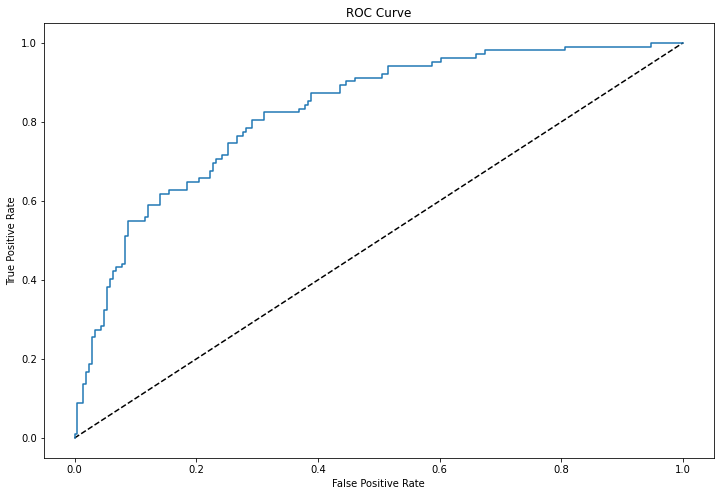

In [23]:
# Plot ROC curve
fig=plt.figure(figsize=(12,8))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

This ROC curve provides a nice visual way to assess your classifier's performance.

## Precision-recall Curve

When looking at your ROC curve, you may have noticed that the y-axis (True positive rate) is also known as recall. Indeed, in addition to the ROC curve, there are other ways to visually evaluate model performance. One such way is the precision-recall curve, which is generated by plotting the precision and recall for different thresholds. As a reminder, precision and recall are defined as:

 $$Precision = \frac {TP}{TP+FP}$$
 $$Recall = \frac {TP}{TP+FN}$$

On the right, a precision-recall curve has been generated for the diabetes dataset. The classification report and confusion matrix are displayed in the IPython Shell.

Study the precision-recall curve and then consider the statements given below. Choose the one statement that is not true. Note that here, the class is positive (1) if the individual has diabetes.

For more on Prediciton and recall calculation are:

1. [here](https://github.com/Aduzona/Machine_learning/blob/master/10_Confusion%20matrix%20and%20data%20imbalances/7_More%20metrics%20derived%20from%20confusion%20matrices.ipynb)


2. [here](https://github.com/Aduzona/Machine_learning/blob/master/12_Train%20and%20evaluate%20classification%20models/3_Train%20and%20evaluate%20a%20classification%20model.ipynb)

3. [here](https://github.com/Aduzona/Machine_learning/blob/master/12_Train%20and%20evaluate%20classification%20models/5_Perform%20classification%20with%20alternative%20metrics.ipynb)

**Precision Recall curve**

![Precision Recall curve](Precision_Recall_curve.png)

* A recall of 1 corresponds to a classifier with a low threshold in which all females who contract diabetes were correctly classified as such, at the expense of many misclassifications of those who did not have diabetes.

* Precision is undefined for a classifier which makes no positive predictions, that is, classifies everyone as not having diabetes.

* When the threshold is very close to 1, precision is also 1, because the classifier is absolutely certain about its predictions.

## AUC computation

Say you have a binary classifier that in fact is just randomly making guesses. It would be correct approximately 50% of the time, and the resulting ROC curve would be a diagonal line in which the True Positive Rate and False Positive Rate are always equal. The Area under this ROC curve would be 0.5. This is one way in which the AUC, which Hugo discussed in the video, is an informative metric to evaluate a model. If the AUC is greater than 0.5, the model is better than random guessing. Always a good sign!

In this exercise, you'll calculate AUC scores using the roc_auc_score() function from sklearn.metrics as well as by performing cross-validation on the diabetes dataset.

X and y, along with training and test sets X_train, X_test, y_train, y_test, have been pre-loaded for you, and a logistic regression classifier logreg has been fit to the training data.

* Import roc_auc_score from sklearn.metrics and cross_val_score from sklearn.model_selection.
* Using the logreg classifier, which has been fit to the training data, compute the predicted probabilities of the labels of the test set X_test. Save the result as y_pred_prob.
* Compute the AUC score using the roc_auc_score() function, the test set labels y_test, and the predicted probabilities y_pred_prob.
* Compute the AUC scores by performing 5-fold cross-validation. Use the cross_val_score() function and specify the scoring parameter to be 'roc_auc'.

In [24]:
# Import necessary modules
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

# Compute cross-validated AUC scores: cv_auc
cv_auc = cross_val_score(logreg,X,y,cv=5,scoring='roc_auc')

# Print list of AUC scores
print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))

AUC: 0.8242432895488293
AUC scores computed using 5-fold cross-validation: [0.81240741 0.80777778 0.82555556 0.87283019 0.84471698]


You now have a number of different methods you can use to evaluate your model's performance.

## Hyperparameter tuning

Hyperparameter tuning with GridSearchCV
Hugo demonstrated how to tune the n_neighbors parameter of the KNeighborsClassifier() using GridSearchCV on the voting dataset. You will now practice this yourself, but by using logistic regression on the diabetes dataset instead!

Like the alpha parameter of lasso and ridge regularization that you saw earlier, logistic regression also has a regularization parameter: C. C controls the inverse of the regularization strength, and this is what you will tune in this exercise. A large C can lead to an overfit model, while a small C can lead to an underfit model.

The hyperparameter space for C has been setup for you. Your job is to use GridSearchCV and logistic regression to find the optimal C in this hyperparameter space. The feature array is available as X and target variable array is available as y.

You may be wondering why you aren't asked to split the data into training and test sets. Good observation! Here, we want you to focus on the process of setting up the hyperparameter grid and performing grid-search cross-validation. In practice, you will indeed want to hold out a portion of your data for evaluation purposes, and you will learn all about this in the next video!

* Import LogisticRegression from sklearn.linear_model and GridSearchCV from sklearn.model_selection.
* Setup the hyperparameter grid by using c_space as the grid of values to tune  over.
* Instantiate a logistic regression classifier called logreg.
* Use GridSearchCV with 5-fold cross-validation to tune :
    * Inside GridSearchCV(), specify the classifier, parameter grid, and number of folds to use.
    * Use the .fit() method on the GridSearchCV object to fit it to the data X and y.
* Print the best parameter and best score obtained from GridSearchCV by accessing the best_params_ and best_score_ attributes of logreg_cv

In [26]:
# Import necessary modules
from sklearn.model_selection import GridSearchCV

# Setup the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}

# Instantiate a logistic regression classifier: logreg
logreg = LogisticRegression(max_iter=1000)

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)

# Fit it to the data
logreg_cv.fit(X,y)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))


Tuned Logistic Regression Parameters: {'C': 0.006105402296585327}
Best score is 0.7734742381801205


It looks like a 'C' of 0.006 results in the best performance.

## Hyperparameter tuning with RandomizedSearchCV

GridSearchCV can be computationally expensive, especially if you are searching over a large hyperparameter space and dealing with multiple hyperparameters. A solution to this is to use RandomizedSearchCV, in which not all hyperparameter values are tried out. Instead, a fixed number of hyperparameter settings is sampled from specified probability distributions. You'll practice using RandomizedSearchCV in this exercise and see how this works.

Here, you'll also be introduced to a new model: the Decision Tree. Don't worry about the specifics of how this model works. Just like k-NN, linear regression, and logistic regression, decision trees in scikit-learn have .fit() and .predict() methods that you can use in exactly the same way as before. Decision trees have many parameters that can be tuned, such as max_features, max_depth, and min_samples_leaf: This makes it an ideal use case for RandomizedSearchCV.

As before, the feature array X and target variable array y of the diabetes dataset have been pre-loaded. The hyperparameter settings have been specified for you. Your goal is to use RandomizedSearchCV to find the optimal hyperparameters. Go for it!

* Specify the parameters and distributions to sample from. This has been done for you.
* Instantiate a DecisionTreeClassifier.
* Use RandomizedSearchCV with 5-fold cross-validation to tune the hyperparameters:
    * Inside RandomizedSearchCV(), specify the classifier, parameter distribution, and number of folds to use.
    * Use the .fit() method on the RandomizedSearchCV object to fit it to the data X and y.
* Print the best parameter and best score obtained from RandomizedSearchCV by accessing the best_params_ and best_score_ attributes of tree_cv.

In [28]:
# Import necessary modules
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()

# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)

# Fit it to the data
tree_cv.fit(X,y)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))


Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': 3, 'max_features': 3, 'min_samples_leaf': 5}
Best score is 0.7357355063237416


Note that RandomizedSearchCV will never outperform GridSearchCV. Instead, it is valuable because it saves on computation time.

## Hold-out set for final evaluation

Hold-out set helps you to be absolutely certain about your model's ability to generalize to unseen data.

### Hold-out set in practice I: Classification

You will now practice evaluating a model with tuned hyperparameters on a hold-out set. The feature array and target variable array from the diabetes dataset have been pre-loaded as X and y.

In addition to $\mathbb C$, logistic regression has a 'penalty' hyperparameter which specifies whether to use 'l1' or 'l2' regularization. Your job in this exercise is to create a hold-out set, tune the 'C' and 'penalty' hyperparameters of a logistic regression classifier using GridSearchCV on the training set.

* Create the hyperparameter grid:
    * Use the array c_space as the grid of values for 'C'.
    * For 'penalty', specify a list consisting of 'l1' and 'l2'.
* Instantiate a logistic regression classifier.
* Create training and test sets. Use a test_size of 0.4 and random_state of 42. In practice, the test set here will function as the hold-out set.
* Tune the hyperparameters on the training set using GridSearchCV with 5-folds. This involves first instantiating the GridSearchCV object with the correct parameters and then fitting it to the training data.
* Print the best parameter and best score obtained from GridSearchCV by accessing the best_params_ and best_score_ attributes of logreg_cv.

In [40]:
np.array([0.4393970560760795]).shape

(1,)

In [58]:
c_space

array([1.00000000e-05, 8.48342898e-05, 7.19685673e-04, 6.10540230e-03,
       5.17947468e-02, 4.39397056e-01, 3.72759372e+00, 3.16227766e+01,
       2.68269580e+02, 2.27584593e+03, 1.93069773e+04, 1.63789371e+05,
       1.38949549e+06, 1.17876863e+07, 1.00000000e+08])

In [42]:
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space, 'penalty': ['l1', 'l2']}
#param_grid = {'C': np.array([0.4393970560760795]), 'penalty': ['l1']}

# Instantiate the logistic regression classifier: logreg
logreg = LogisticRegression(max_iter=100, solver="liblinear")

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=42)

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg,param_grid,cv=5)

# Fit it to the training data
logreg_cv.fit(X_train,y_train)

# Print the optimal parameters and best score
print("Tuned Logistic Regression Parameter: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Accuracy: {}".format(logreg_cv.best_score_))


Tuned Logistic Regression Parameter: {'C': 3.727593720314938, 'penalty': 'l2'}
Tuned Logistic Regression Accuracy: 0.7608695652173914


### Hold-out set in practice II: Regression

Remember lasso and ridge regression from the previous chapter? Lasso used the L1 penalty to regularize, while ridge used the L2 penalty. There is another type of regularized regression known as the elastic net. In elastic net regularization, the penalty term is a linear combination of the L1 and L2 penalties:

$$a * L1+ b* L2$$

In scikit-learn, this term is represented by the 'l1_ratio' parameter: An 'l1_ratio' of 1 corresponds to an L1 penalty, and anything lower is a combination of L1 and L2.

In this exercise, you will GridSearchCV to tune the 'l1_ratio' of an elastic net model trained on the Gapminder data. As in the previous exercise, use a hold-out set to evaluate your model's performance.

In [48]:
df = pd.read_csv('gm_2008_region.csv')
df.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,Middle East & North Africa
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,America
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,Europe & Central Asia
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,East Asia & Pacific


In [49]:
df.shape

(139, 10)

In [54]:
X.shape

(139, 8)

In [55]:
# Import necessary modules
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

X=df.drop(['life','Region'],axis=1).values.reshape(-1,8)
y=df['life'].values.reshape(-1,1)

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=42)

# Create the hyperparameter grid
l1_space = np.linspace(0, 1, 30)
param_grid = {'l1_ratio': l1_space}

# Instantiate the ElasticNet regressor: elastic_net
elastic_net = ElasticNet()

# Setup the GridSearchCV object: gm_cv
gm_cv = GridSearchCV(elastic_net, param_grid, cv=5)

# Fit it to the training data
gm_cv.fit(X_train,y_train)

# Predict on the test set and compute metrics
y_pred = gm_cv.predict(X_test)
r2 = gm_cv.score(X_test,y_test)
mse = mean_squared_error(y_test,y_pred)
print("Tuned ElasticNet l1 ratio: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))
print("Tuned ElasticNet MSE: {}".format(mse))

C:\Users\aduzo\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 282.4862175850656, tolerance: 0.558941590909091
  positive)
C:\Users\aduzo\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 309.8466391486289, tolerance: 0.5893071666666667
  positive)
C:\Users\aduzo\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 255.50344008061265, tolerance: 0.5890250303030303
  positive)
C:\Users\aduzo\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dualit

Tuned ElasticNet l1 ratio: {'l1_ratio': 0.20689655172413793}
Tuned ElasticNet R squared: 0.8668305372460284
Tuned ElasticNet MSE: 10.057914133398437


it's time to learn about preprocessing techniques and how to piece together all the different stages of the machine learning process into a pipeline!